In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
rnd_st = 1810

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline # конвейер подготовки данных
from sklearn.pipeline import Pipeline # конвеер алгоритмов
from sklearn.impute import SimpleImputer # пропуски заполняются медианными значениями
from sklearn.preprocessing import OneHotEncoder, StandardScaler # onehot encoding и стандартизации
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, RocCurveDisplay
from sklearn import metrics
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [228]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import joblib
import os
from sklearn.neural_network import MLPClassifier
from itertools import product
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/pihwgdBPVuezdw')
df.head(12)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


In [4]:
df.tail(12)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10115,712210458,Existing Customer,38,M,1,Uneducated,Single,$40K - $60K,Blue,36,2,3,2,5639.0,1558,4081.0,0.614,16628,109,0.946,0.276,0.000174,0.999830
10116,714109308,Existing Customer,46,M,5,College,Single,$80K - $120K,Blue,36,1,2,3,13187.0,2241,10946.0,0.689,15354,112,0.931,0.170,0.000192,0.999810
10117,712503408,Existing Customer,57,M,2,Graduate,Married,$80K - $120K,Blue,40,6,3,4,17925.0,1909,16016.0,0.712,17498,111,0.820,0.106,0.000516,0.999480
10118,713755458,Attrited Customer,50,M,1,Unknown,Unknown,$80K - $120K,Blue,36,6,3,4,9959.0,952,9007.0,0.825,10310,63,1.100,0.096,0.998130,0.001874
10119,716893683,Attrited Customer,55,F,3,Uneducated,Single,Unknown,Blue,47,4,3,3,14657.0,2517,12140.0,0.166,6009,53,0.514,0.172,0.996910,0.003088
10120,710841183,Existing Customer,54,M,1,High School,Single,$60K - $80K,Blue,34,5,2,0,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151,0.000038,0.999960
10121,713899383,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,50,4,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164,0.000148,0.999850
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118


In [5]:
df.drop_duplicates(inplace=True)
df.shape

(10127, 23)

In [6]:
df.rename(
    columns={"Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1": "NB1", 
             "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2": "NB2"},
    inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [8]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,NB1,NB2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [9]:
del df['CLIENTNUM']

In [215]:
df['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [216]:
df['Income_Category'].value_countsts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [223]:
((df['Education_Level']=='Unknown')|(df['Income_Category']=='Unknown')).value_counts()

False    7641
True     2486
dtype: int64

In [10]:
df_target = df.Attrition_Flag
df_target

0        Existing Customer
1        Existing Customer
2        Existing Customer
3        Existing Customer
4        Existing Customer
               ...        
10122    Existing Customer
10123    Attrited Customer
10124    Attrited Customer
10125    Attrited Customer
10126    Attrited Customer
Name: Attrition_Flag, Length: 10127, dtype: object

In [11]:
df_target.where(~(df_target=='Attrited Customer'), other='1 Attrited Customer', inplace=True)
df_target.where(~(df_target=='Existing Customer'), other='0 Existing Customer', inplace=True)

In [12]:
df_target

0        0 Existing Customer
1        0 Existing Customer
2        0 Existing Customer
3        0 Existing Customer
4        0 Existing Customer
                ...         
10122    0 Existing Customer
10123    1 Attrited Customer
10124    1 Attrited Customer
10125    1 Attrited Customer
10126    1 Attrited Customer
Name: Attrition_Flag, Length: 10127, dtype: object

In [16]:
df_target_le = LabelEncoder()
df_target_le.fit_transform(df_target)
df_target_le.classes_

array(['0 Existing Customer', '1 Attrited Customer'], dtype=object)

In [17]:
df_y = pd.Series(df_target_le.fit_transform(df_target))

In [18]:
df_y.value_counts()

0    8500
1    1627
dtype: int64

In [19]:
del df['Attrition_Flag']

In [20]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,NB1,NB2
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [21]:
numeric_features = list(df.select_dtypes(include = np.number).columns)
categorical_features = list(df.select_dtypes(exclude = np.number).columns)

In [22]:
numeric_features

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'NB1',
 'NB2']

In [23]:
categorical_features

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

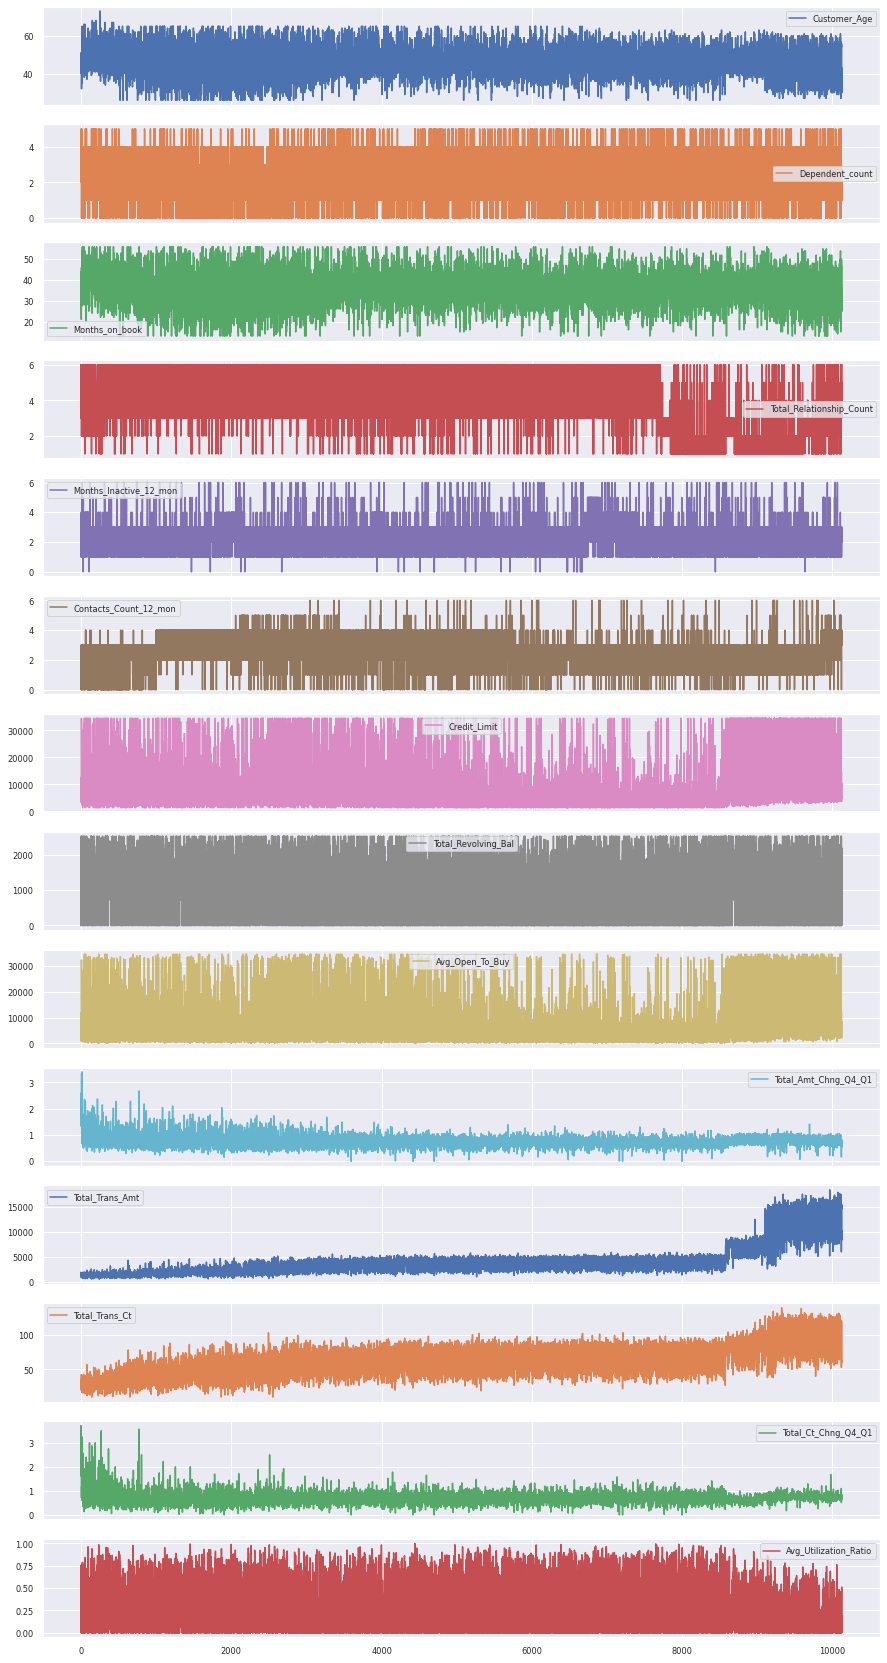

In [226]:
sns.set(font_scale=0.75)
df.plot(subplots=True, figsize = (15, 30));

In [24]:
df_ohe = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [25]:
df_ohe

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,NB1,NB2,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0


In [26]:
df_ohe.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,NB1,NB2,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003,0.470919,0.044534,0.308877,0.198776,0.050953,0.146835,0.149995,0.462822,0.389355,0.073961,0.176755,0.138442,0.151575,0.351634,0.109805,0.011455,0.001975,0.054804
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301,0.499178,0.206289,0.462053,0.399098,0.219912,0.353959,0.357084,0.498641,0.487628,0.261720,0.381480,0.345380,0.358626,0.477504,0.312663,0.106416,0.044398,0.227608
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
df_ohe['label'] = df_y

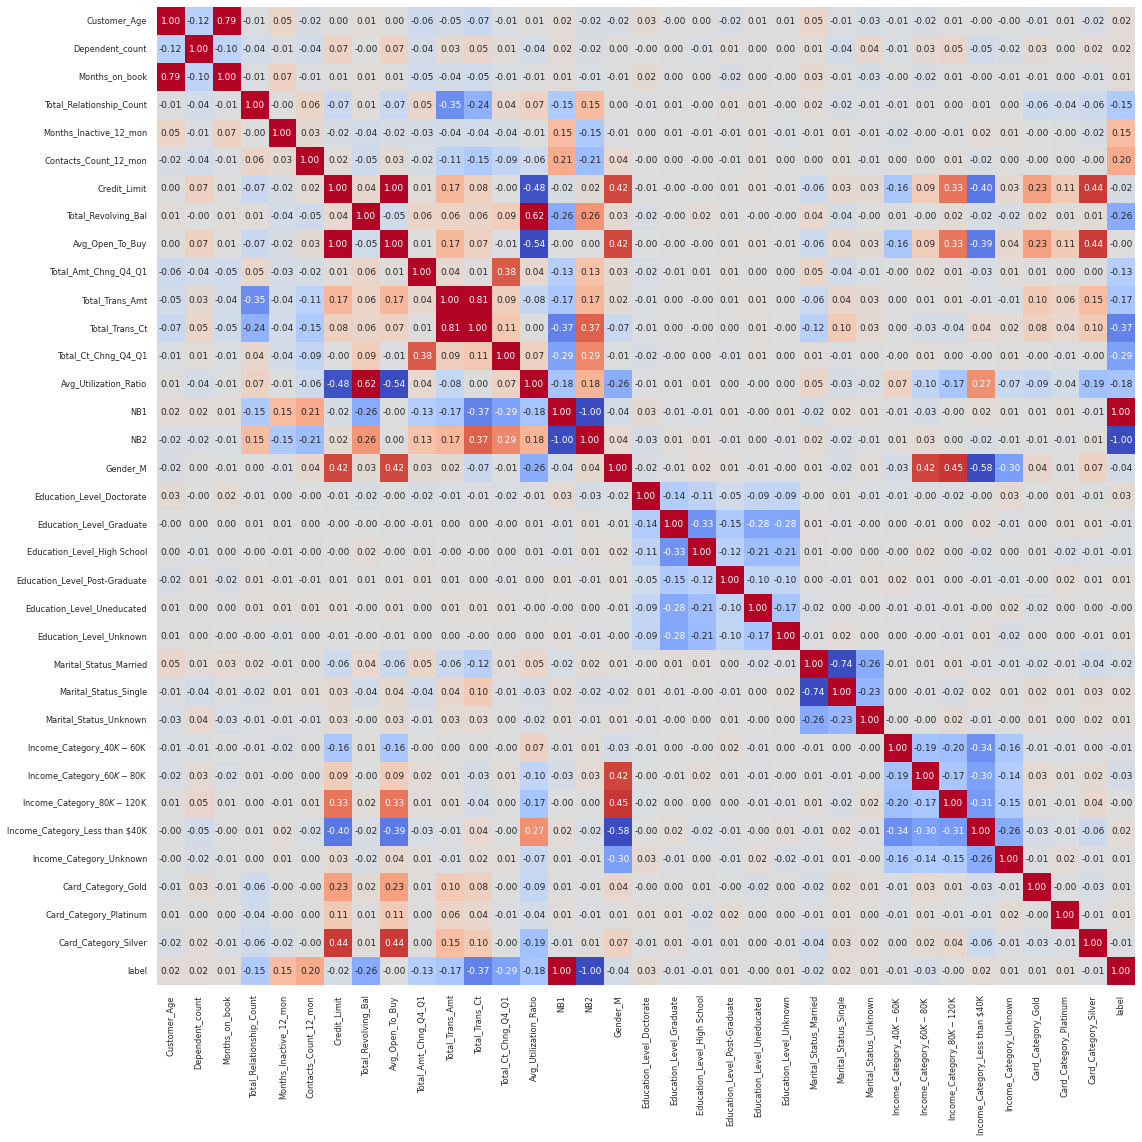

In [28]:
sns.set(font_scale=0.75)
plt.subplots(figsize=(18,18))
sns.heatmap(df_ohe.corr(), fmt=".2f", annot=True, square=True, cmap='coolwarm', vmin=-0.5, vmax=0.5, cbar=False);

In [29]:
del df_ohe['NB1']
del df_ohe['NB2']
del df['NB1']
del df['NB2']
numeric_features.remove('NB1')
numeric_features.remove('NB2')

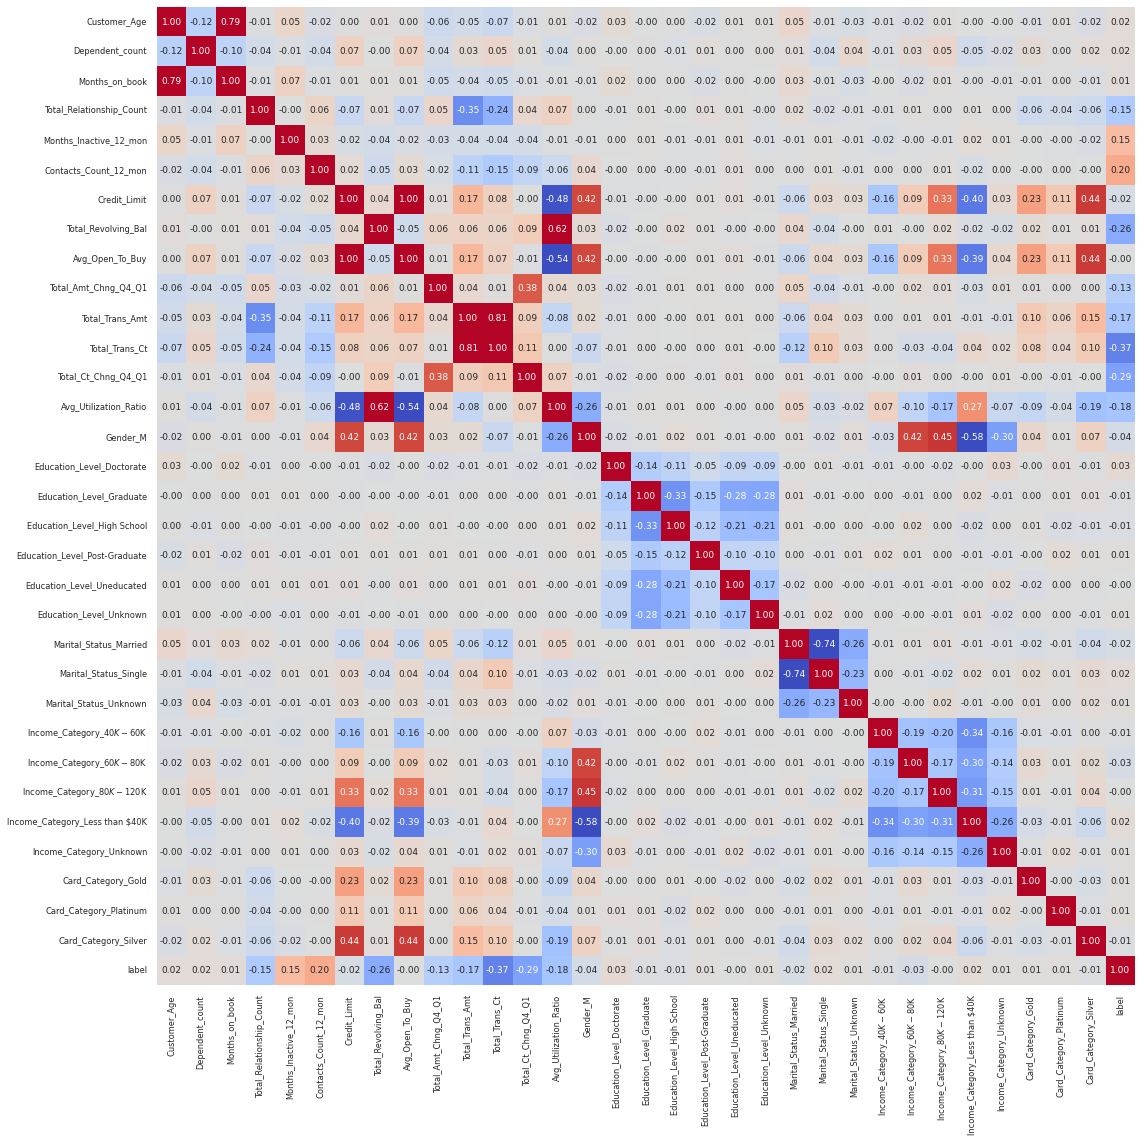

In [30]:
sns.set(font_scale=0.75)
plt.subplots(figsize=(18,18))
sns.heatmap(df_ohe.corr(), fmt=".2f", annot=True, square=True, cmap='coolwarm', vmin=-0.5, vmax=0.5, cbar=False);

In [31]:
df_ohe.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,label
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0


In [32]:
df.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [33]:
del df_ohe['label']

In [232]:
df_ohe.shape

(10127, 32)

### PCA

In [264]:
ct = ColumnTransformer([('numproc', StandardScaler(), numeric_features)], remainder='passthrough')
df_ohe_scaled = ct.fit_transform(df_ohe)

In [265]:
pca = PCA()
pca.fit(df_ohe_scaled)
pca.explained_variance_ratio_

array([1.63287227e-01, 1.26318921e-01, 1.10354262e-01, 8.99523247e-02,
       7.68197287e-02, 6.16691548e-02, 6.04323130e-02, 5.55614527e-02,
       4.96844292e-02, 3.68808849e-02, 2.56626016e-02, 2.03911728e-02,
       1.60522145e-02, 1.31483194e-02, 1.28923162e-02, 1.21589075e-02,
       1.08584898e-02, 1.02162456e-02, 9.11203089e-03, 8.64357179e-03,
       7.75752299e-03, 6.71899213e-03, 4.14161951e-03, 2.88388804e-03,
       2.58908218e-03, 2.38987875e-03, 1.28781428e-03, 8.54410037e-04,
       6.41801992e-04, 5.21151640e-04, 1.17271138e-04, 5.37943140e-33])

In [266]:
pca.explained_variance_ratio_.sum()

0.9999999999999999

In [315]:
pca = PCA(n_components=2)
pca.fit(df_ohe_scaled)
pca.explained_variance_ratio_

array([0.16328723, 0.12631892])

In [316]:
pca.explained_variance_ratio_.sum()

0.2896061475203907

In [317]:
df_pca = pca.transform(df_ohe_scaled)

#### Два компонена описывают 29% дисперсии изначального набора данных...

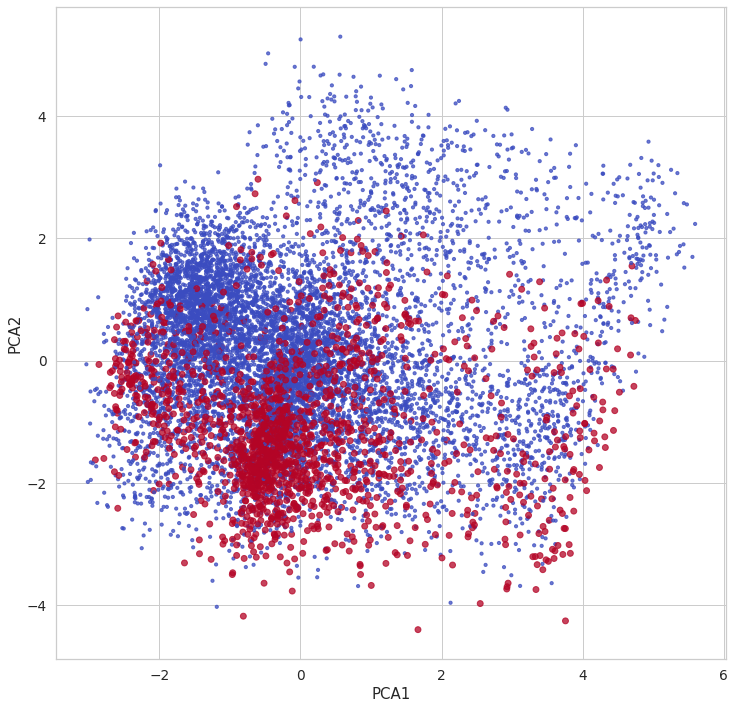

In [318]:
sns.set(style='whitegrid', font_scale=1.25)
plt.figure(figsize=(12,12))
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.scatter(df_pca[:,0], df_pca[:,1], s=10+25*np.array(df_y), c=np.array(df_y), cmap='coolwarm', alpha=0.75);

In [319]:
var_vs_nc = np.array([], dtype=float)
ncs = np.arange(1, 33)
for nc in ncs:
    pca = PCA(n_components=nc)
    pca.fit(df_ohe_scaled)
    var_vs_nc = np.append(var_vs_nc, pca.explained_variance_ratio_.sum())
print(var_vs_nc)

[0.16328723 0.28960615 0.39996041 0.48991273 0.56673246 0.6284016
 0.68883392 0.74439538 0.7940798  0.83096063 0.85662329 0.87701441
 0.89306668 0.90621498 0.91910731 0.93126623 0.94212472 0.95234096
 0.961453   0.97009657 0.97785409 0.98457308 0.9887147  0.99159859
 0.99418767 0.99657755 0.99786537 0.99871978 0.99936158 0.99988273
 1.         1.        ]


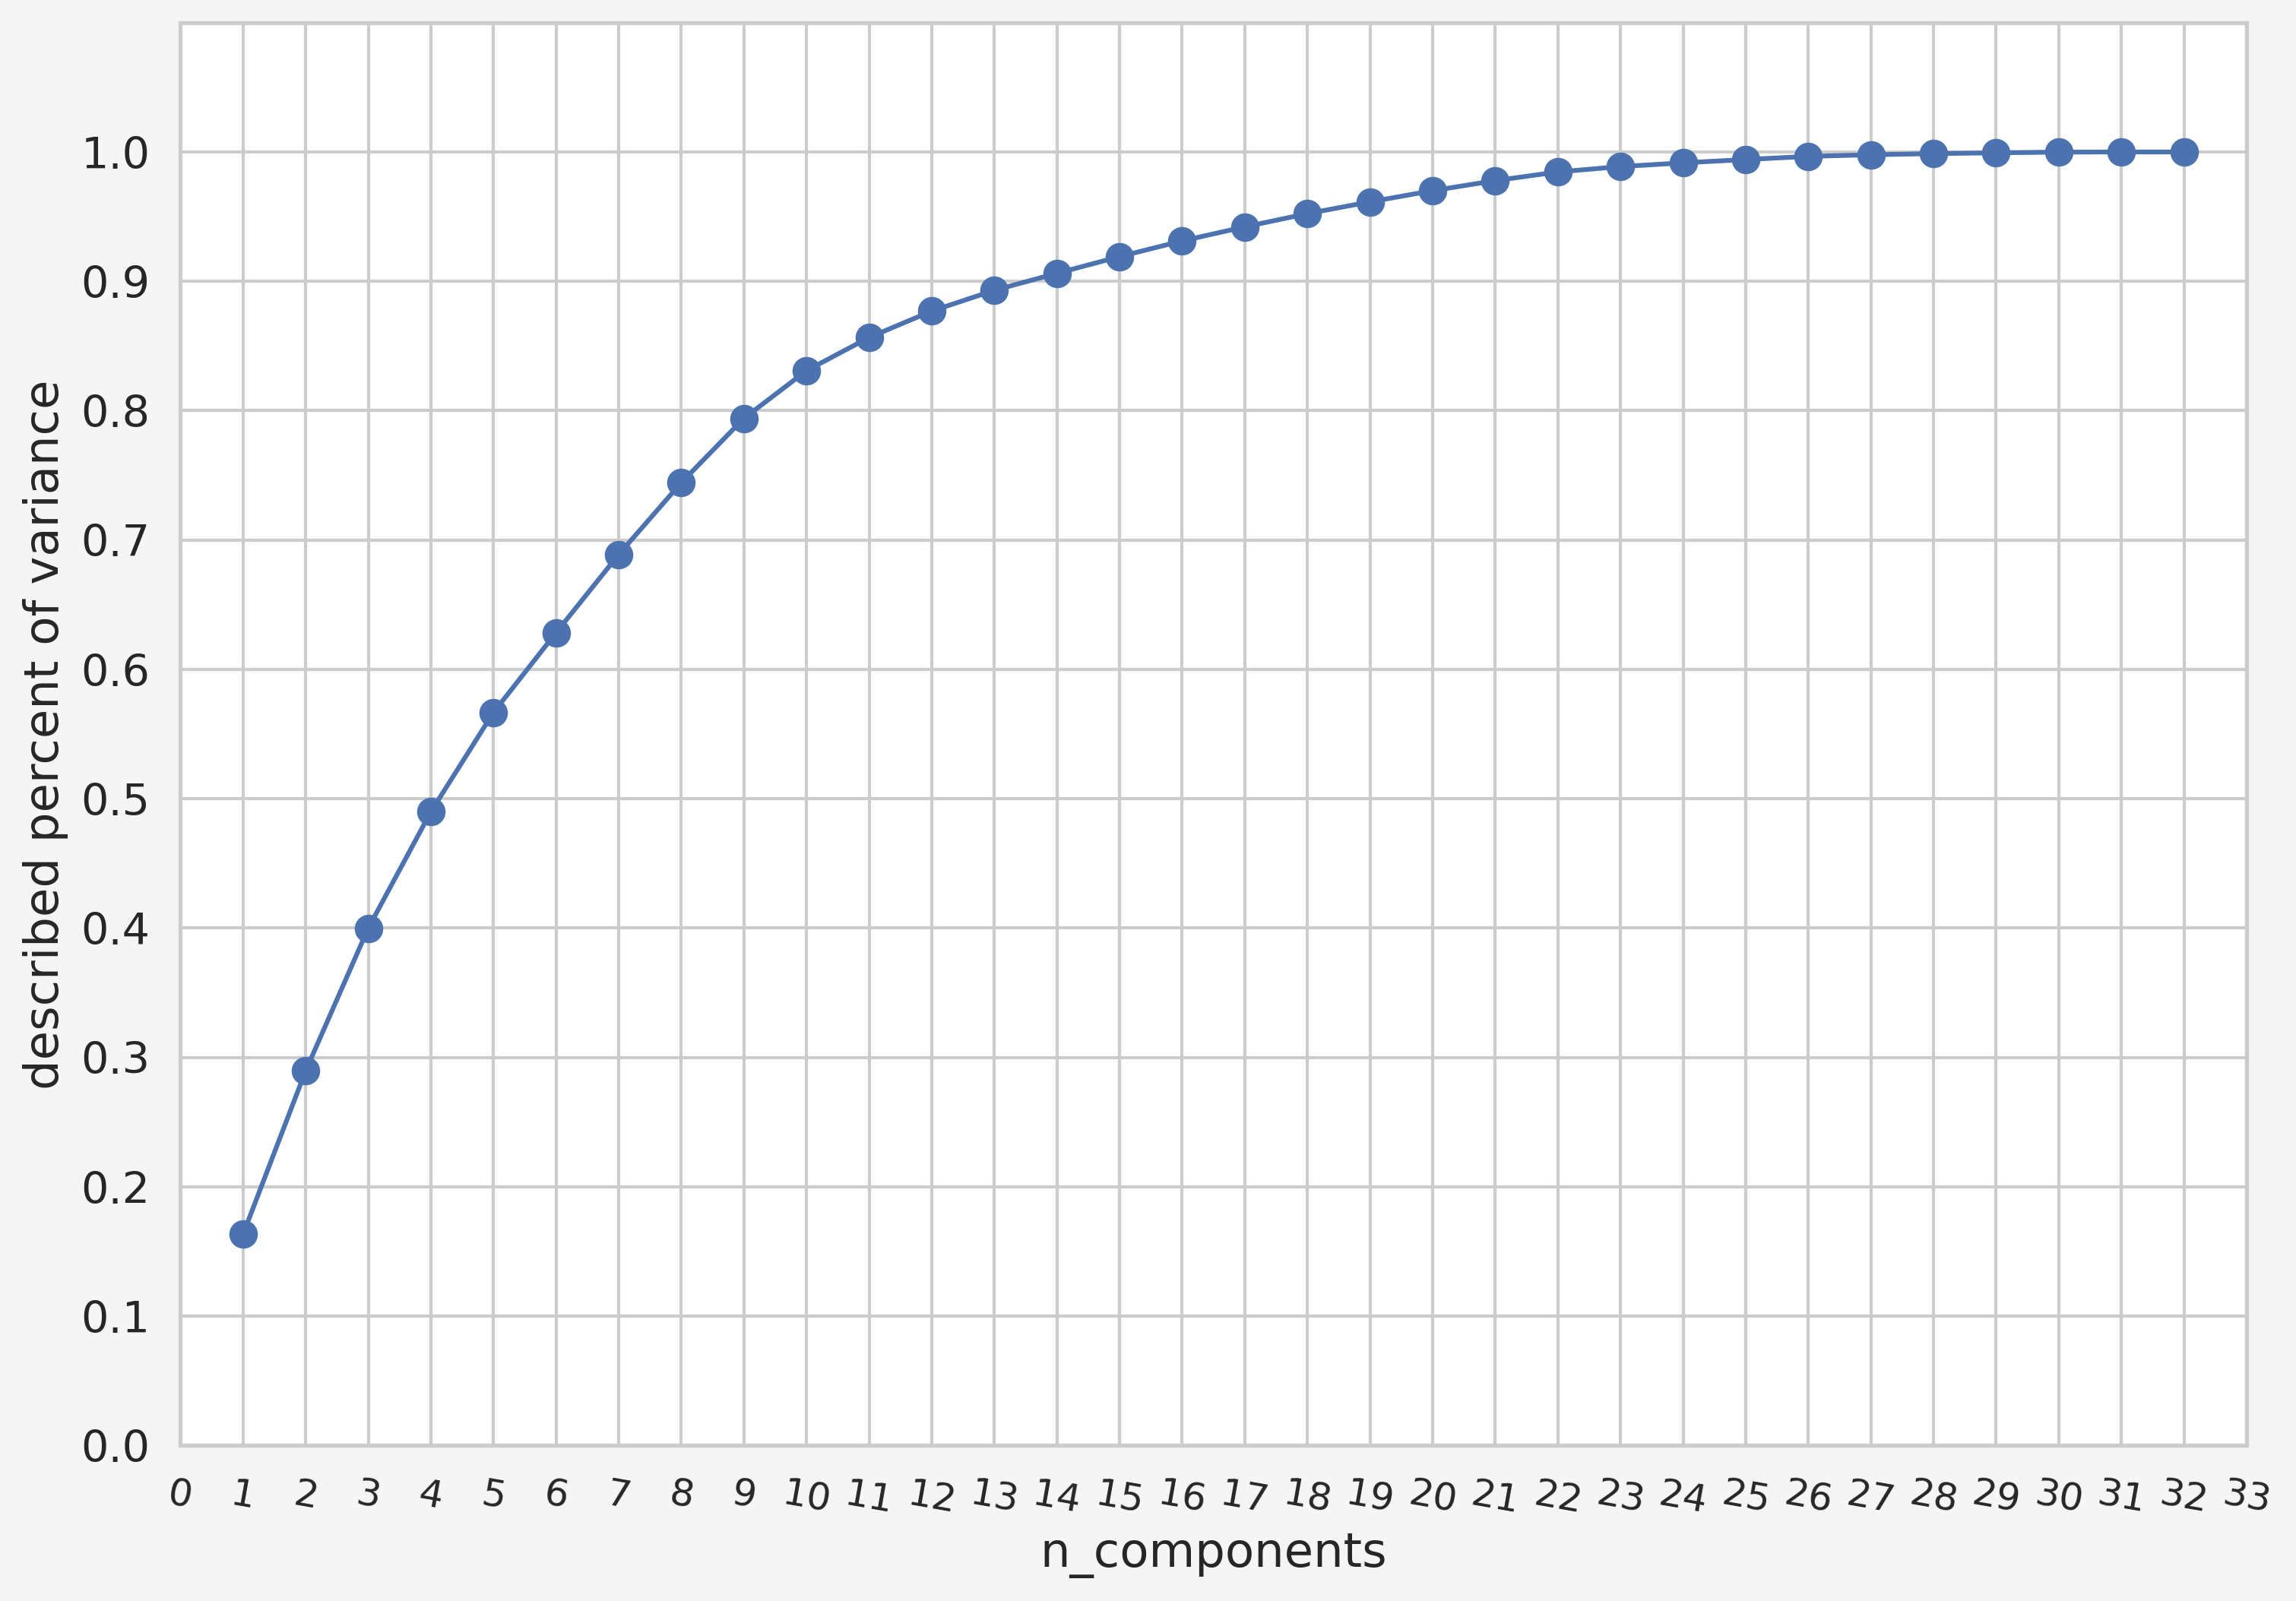

In [320]:
sns.set(style='whitegrid', font_scale=1.25)
fig = plt.figure(
    figsize=(29.7/2.54, 21/2.54),
    dpi=300,
    facecolor='whitesmoke')
ax = fig.add_subplot(111)


ax.set_xticks(np.arange(0, 34, 1))
ax.set_xticklabels(np.arange(0, 34, 1),
    rotation=-10,
    fontsize=12
)

ax.set_xlim(0, 33)
plt.xlabel('n_components')

ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_ylim(0, 1.1)
plt.ylabel('described percent of variance')

plt.plot(ncs,var_vs_nc, 'o-', ms=8)
plt.show()

#### Видно, что можем оставить 14 признаков, сохранив не менее 90% дисперсии изначального набора данных.

In [322]:
df_pca = PCA(n_components=14).fit_transform(df_ohe_scaled)

In [327]:
df_pca.shape

(10127, 14)

In [328]:
X_train_ohe, X_test_ohe, y_train, y_test = tts(df_ohe, df_y, stratify=df_y, test_size=0.2, random_state=rnd_st)
X_train_cat, X_test_cat, y_train, y_test = tts(df, df_y, stratify=df_y, test_size=0.2, random_state=rnd_st)
X_train_pca, X_test_pca, y_train, y_test = tts(df_pca, df_y, stratify=df_y, test_size=0.2, random_state=rnd_st)

### RandomForestClassifier

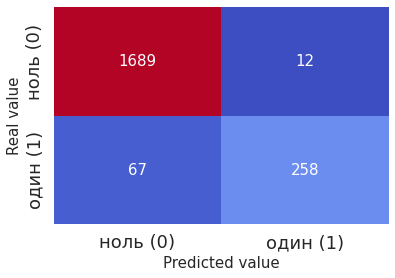

                     precision    recall  f1-score   support

0 Existing Customer       0.96      0.99      0.98      1701
1 Attrited Customer       0.96      0.79      0.87       325

           accuracy                           0.96      2026
          macro avg       0.96      0.89      0.92      2026
       weighted avg       0.96      0.96      0.96      2026



In [40]:
ShowHeat(RandomForestClassifier(n_estimators=5000, n_jobs=-1, random_state=rnd_st).fit(X_train_ohe, y_train).predict(X_test_ohe))

### RandomForestClassifier + PCA

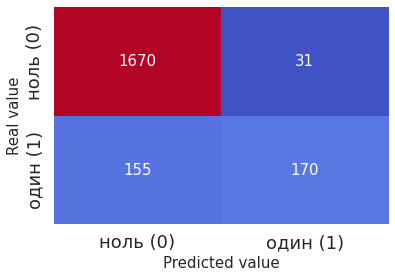

                     precision    recall  f1-score   support

0 Existing Customer       0.92      0.98      0.95      1701
1 Attrited Customer       0.85      0.52      0.65       325

           accuracy                           0.91      2026
          macro avg       0.88      0.75      0.80      2026
       weighted avg       0.90      0.91      0.90      2026



In [329]:
ShowHeat(RandomForestClassifier(n_estimators=5000, n_jobs=-1, random_state=rnd_st).fit(X_train_pca, y_train).predict(X_test_pca))

### AdaBoostClassifier

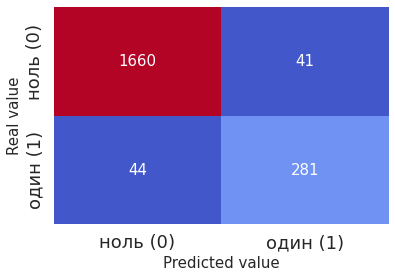

                     precision    recall  f1-score   support

0 Existing Customer       0.97      0.98      0.98      1701
1 Attrited Customer       0.87      0.86      0.87       325

           accuracy                           0.96      2026
          macro avg       0.92      0.92      0.92      2026
       weighted avg       0.96      0.96      0.96      2026



In [39]:
abc = AdaBoostClassifier(n_estimators=1000, random_state=rnd_st)
abc.fit(X_train_ohe, y_train)
ShowHeat(abc.predict(X_test_ohe))

### AdaBoostClassifier + PCA

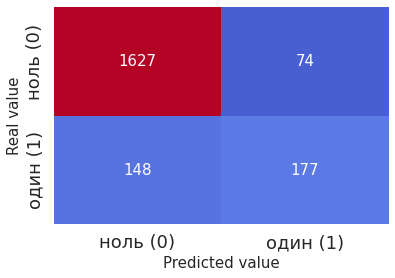

                     precision    recall  f1-score   support

0 Existing Customer       0.92      0.96      0.94      1701
1 Attrited Customer       0.71      0.54      0.61       325

           accuracy                           0.89      2026
          macro avg       0.81      0.75      0.78      2026
       weighted avg       0.88      0.89      0.88      2026



In [330]:
abc = AdaBoostClassifier(n_estimators=1000, random_state=rnd_st)
abc.fit(X_train_pca, y_train)
ShowHeat(abc.predict(X_test_pca))

### XGBClassifier

In [35]:
param_dist = {'objective':'binary:logistic', 
              'n_estimators':1000, 
              'eval_metric':'logloss', 
              'early_stopping_rounds':25}

search_dict = {'scale_pos_weight':np.linspace(2,20,10,dtype=float)}

clf = xgb.XGBClassifier(**param_dist)

clf_gs = GridSearchCV(clf, search_dict, 
                        cv = 5, 
                        verbose = True,
                        scoring='f1',   
                        n_jobs=-1)

clf_gs.fit(X_train_ohe, y_train, eval_set=[(X_test_ohe, y_test)], verbose=False)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=25,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max...one,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=1000, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'scale_pos_weight': array([ 2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.])},
             scoring='f1', verbose=True)

In [36]:
def ShowHeat(y_pred, y_real = y_test):
    sns.set(font_scale=1.25)

    fig = plt.figure(figsize=(6,4))
    nn_mtx = metrics.confusion_matrix(y_real, y_pred)
    font = {'weight' : 'bold', 'size'   :22}
    matplotlib.rc('xtick', labelsize=18) 
    matplotlib.rc('ytick', labelsize=18) 
    sns.heatmap(nn_mtx, annot=True, fmt="d", 
                xticklabels=['ноль (0)', 'один (1)'], 
                yticklabels=['ноль (0)', 'один (1)'],
                cmap='coolwarm', vmin=0, cbar=False)
    plt.ylabel("Real value")
    plt.xlabel("Predicted value")
    plt.show()
    print(metrics.classification_report(df_target_le.inverse_transform(y_real), df_target_le.inverse_transform(y_pred)))

In [37]:
clf_gs.best_params_, clf_gs.best_score_

({'scale_pos_weight': 10.0}, 0.9094514270999203)

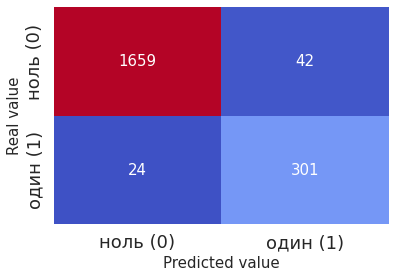

                     precision    recall  f1-score   support

0 Existing Customer       0.99      0.98      0.98      1701
1 Attrited Customer       0.88      0.93      0.90       325

           accuracy                           0.97      2026
          macro avg       0.93      0.95      0.94      2026
       weighted avg       0.97      0.97      0.97      2026



In [38]:
ShowHeat(clf_gs.predict(X_test_ohe), y_test)

### XGBClassifier + PCA

In [332]:
param_dist = {'objective':'binary:logistic', 
              'n_estimators':1000, 
              'eval_metric':'logloss', 
              'early_stopping_rounds':25}

search_dict = {'scale_pos_weight':np.linspace(2,20,10,dtype=float)}

clf = xgb.XGBClassifier(**param_dist)

clf_gs = GridSearchCV(clf, search_dict, 
                        cv = 5, 
                        verbose = True,
                        scoring='f1',   
                        n_jobs=-1)

clf_gs.fit(X_train_pca, y_train, eval_set=[(X_test_pca, y_test)], verbose=False)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=25,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max...one,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=1000, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'scale_pos_weight': array([ 2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.])},
             scoring='f1', verbose=True)

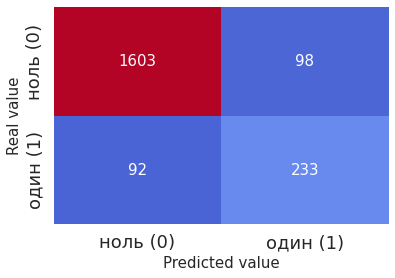

                     precision    recall  f1-score   support

0 Existing Customer       0.95      0.94      0.94      1701
1 Attrited Customer       0.70      0.72      0.71       325

           accuracy                           0.91      2026
          macro avg       0.82      0.83      0.83      2026
       weighted avg       0.91      0.91      0.91      2026



In [333]:
ShowHeat(clf_gs.predict(X_test_pca), y_test)

#### На PCA компонентах качество моделей заметно снижается...далее не будем их рассматривать...

### LGBMClassifier

In [42]:
# define the model
model = LGBMClassifier(n_estimators=1000, n_jobs=-1, random_state=rnd_st)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=rnd_st)
n_scores = cross_val_score(model, X_train_ohe, y_train, scoring='f1', cv=cv, n_jobs=-1)
# report performance
print('f1_score: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

f1_score: 0.912 (0.012)


In [43]:
lgbm_gs = cross_validate(model, X_train_ohe, y_train, scoring='f1', cv=cv, n_jobs=-1, return_estimator=True)

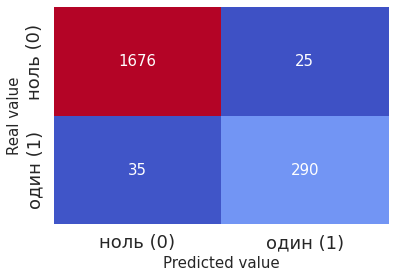

                     precision    recall  f1-score   support

0 Existing Customer       0.98      0.99      0.98      1701
1 Attrited Customer       0.92      0.89      0.91       325

           accuracy                           0.97      2026
          macro avg       0.95      0.94      0.94      2026
       weighted avg       0.97      0.97      0.97      2026



In [44]:
ShowHeat(lgbm_gs['estimator'][lgbm_gs['test_score'].argmax()].predict(X_test_ohe), y_test)

In [ ]:
%%time
search_dict = {'n_estimators':[100, 500, 1000, 2500],
               'max_depth':[4, 8, 12],
               'learning_rate':[0.001, 0.005, 0.01, 0.05, 0.1, 0.3],
               'boosting_type':['gbdt', 'dart', 'goss'],
               'scale_pos_weight':np.linspace(2,20,5,dtype=float)}

model = LGBMClassifier(n_estimators=1000, n_jobs=-1, random_state=rnd_st)

model_gs = GridSearchCV(model, search_dict, 
                        cv = 5, 
                        verbose = True,
                        scoring='f1',   
                        n_jobs=-1)

model_gs.fit(X_train_ohe, y_train, eval_set=[(X_test_ohe, y_test)], verbose=False)

In [203]:
lgbm_best = joblib.load('./hw4lgbm/lgbm_best.pkl')

/home/skr/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LabelEncoder from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [207]:
lgbm_best

LGBMClassifier(boosting_type='dart', max_depth=4, n_estimators=2500,
               random_state=1810, scale_pos_weight=2.0)

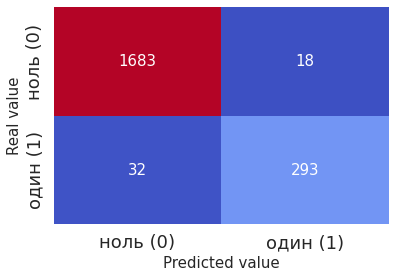

                     precision    recall  f1-score   support

0 Existing Customer       0.98      0.99      0.99      1701
1 Attrited Customer       0.94      0.90      0.92       325

           accuracy                           0.98      2026
          macro avg       0.96      0.95      0.95      2026
       weighted avg       0.98      0.98      0.98      2026



In [204]:
ShowHeat(lgbm_best.predict(X_test_ohe), y_test)

#### LGBMClassifier практически со стандартными гиперпараметрами показывает f1 по первому классу 91%.
#### перебором параметров в достаточно широком диапазоне удалось поднять f1 только до 92%

### CatBoostClassifier

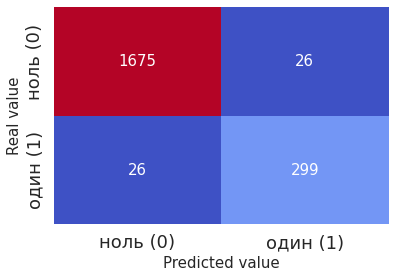

                     precision    recall  f1-score   support

0 Existing Customer       0.98      0.98      0.98      1701
1 Attrited Customer       0.92      0.92      0.92       325

           accuracy                           0.97      2026
          macro avg       0.95      0.95      0.95      2026
       weighted avg       0.97      0.97      0.97      2026



In [58]:
cbc_ohe = CatBoostClassifier(iterations=1000, 
                            use_best_model=True,
                            scale_pos_weight=2.0)
cbc_ohe.fit(X_train_ohe, y_train, verbose=False, eval_set=[(X_test_ohe, y_test)])
ShowHeat(cbc_ohe.predict(X_test_ohe), y_test)

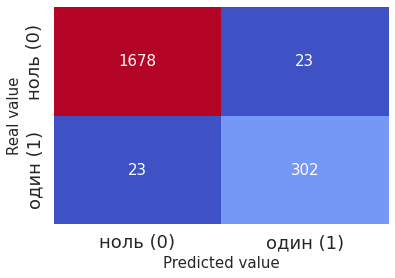

                     precision    recall  f1-score   support

0 Existing Customer       0.99      0.99      0.99      1701
1 Attrited Customer       0.93      0.93      0.93       325

           accuracy                           0.98      2026
          macro avg       0.96      0.96      0.96      2026
       weighted avg       0.98      0.98      0.98      2026



In [62]:
cbc_cat = CatBoostClassifier(iterations=1000, 
                            use_best_model=True,
                        one_hot_max_size=255,
                        cat_features=categorical_features,
                            scale_pos_weight=2.0)
cbc_cat.fit(X_train_cat, y_train, verbose=False, eval_set=[(X_test_cat, y_test)])
ShowHeat(cbc_cat.predict(X_test_cat), y_test)

#### Для CatBoostClassifier не рекомендуется применять предварительный OneHotEncoding...
#### Действительно, на предварительно закодированных данных классификатор показал f1 = 92%,
#### а с использованием встроенного преобразования f1 = 93% !

### CatBoostClassifier + tensorboard + перебор параметров

In [60]:
%load_ext tensorboard

In [66]:
%tensorboard --logdir './hw4models/'



for learning_rate in [0.001, 0.005, 0.01, 0.05, 0.1]:
    for depth in [4, 8, 12]:
        for l2_leaf_reg in [3, 7, 13]:
            model_name = f'lr={learning_rate}|depth={depth}|l2_leaf_reg={l2_leaf_reg}'
            train_dir = './hw4models/' + model_name + '/'

            try:
                os.mkdir(train_dir)
            except:
                pass


            model = CatBoostClassifier(iterations=1000, 
#                                     task_type="GPU",
#                                     devices='0:1',
                                    learning_rate = learning_rate,
                                    train_dir=train_dir,
                                    depth=depth,
                                    l2_leaf_reg=l2_leaf_reg,
                                    cat_features=categorical_features,
                                    scale_pos_weight=2.0)

            model.fit(X_train_cat, y_train, 
                      silent=True,
                      eval_set = (X_test_cat, y_test), 
                      early_stopping_rounds = 25)
            
            model.save_model(train_dir + model_name + '.cbm')

Reusing TensorBoard on port 6006 (pid 8053), started 0:02:09 ago. (Use '!kill 8053' to kill it.)

In [68]:
model = CatBoostClassifier()
model.load_model('./hw4models/lr=0.1|depth=4|l2_leaf_reg=13/lr=0.1|depth=4|l2_leaf_reg=13.cbm')

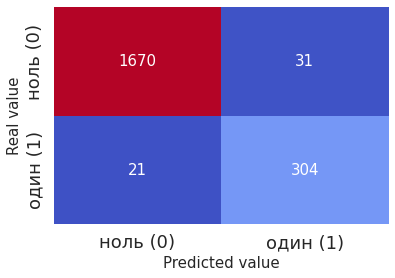

                     precision    recall  f1-score   support

0 Existing Customer       0.99      0.98      0.98      1701
1 Attrited Customer       0.91      0.94      0.92       325

           accuracy                           0.97      2026
          macro avg       0.95      0.96      0.95      2026
       weighted avg       0.97      0.97      0.97      2026



In [70]:
ShowHeat(model.predict(X_test_cat), y_test)

In [71]:
model = CatBoostClassifier()
model.load_model('./hw4models/lr=0.05|depth=4|l2_leaf_reg=7/lr=0.05|depth=4|l2_leaf_reg=7.cbm')

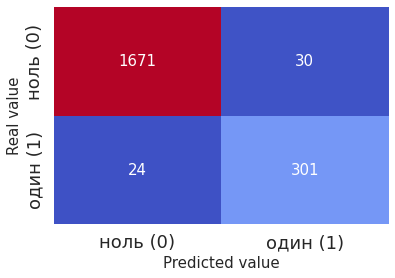

                     precision    recall  f1-score   support

0 Existing Customer       0.99      0.98      0.98      1701
1 Attrited Customer       0.91      0.93      0.92       325

           accuracy                           0.97      2026
          macro avg       0.95      0.95      0.95      2026
       weighted avg       0.97      0.97      0.97      2026



In [72]:
ShowHeat(model.predict(X_test_cat), y_test)

#### Опять же, перебор параметров не дал прироста по f1 для первого класса

In [187]:
np.linspace(2, 100, 10, dtype=int)

array([  2,  12,  23,  34,  45,  56,  67,  78,  89, 100])

In [210]:
numeric_features

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

### MLPClassifier - Нейросеть? :)

In [212]:
search_dict = {'est__hidden_layer_sizes':
               list(product(np.linspace(2, 100, 10, dtype=int), np.linspace(2, 100, 10, dtype=int)))}

clf = MLPClassifier(random_state=rnd_st, max_iter=int(1e4))

ct = ColumnTransformer([('numproc', StandardScaler(), numeric_features)], remainder='passthrough')

clf_pipe=Pipeline([('scale', ct),
                  ('est', clf)])

clf_gs = GridSearchCV(clf_pipe, search_dict, 
                        cv = 5, 
                        verbose = True,
                        scoring='f1',   
                        n_jobs=-1)
# clf_gs.get_params

clf_gs.fit(X_train_ohe, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numproc',
                                                                         StandardScaler(),
                                                                         ['Customer_Age',
                                                                          'Dependent_count',
                                                                          'Months_on_book',
                                                                          'Total_Relationship_Count',
                                                                          'Months_Inactive_12_mon',
                                                                          'Contacts_Count_12_mon',
                                                                          'Credit_Limit',
                                                                          'Total_Revolving_Bal',
                                                                          'Avg_Open_To_Buy',
                                                                          'Total_Amt_Chng_Q4_Q1',
                                                                          'Total_T...
                                        MLPClassifier(max_iter=10000,
                                                      random_state=1810))]),
             n_jobs=-1,
             param_grid={'est__hidden_layer_sizes': [(2, 2), (2, 12), (2, 23),
                                                     (2, 34), (2, 45), (2, 56),
                                                     (2, 67), (2, 78), (2, 89),
                                                     (2, 100), (12, 2),
                                                     (12, 12), (12, 23),
                                                     (12, 34), (12, 45),
                                                     (12, 56), (12, 67),
                                                     (12, 78), (12, 89),
                                                     (12, 100), (23, 2),
                                                     (23, 12), (23, 23),
                                                     (23, 34), (23, 45),
                                                     (23, 56), (23, 67),
                                                     (23, 78), (23, 89),
                                                     (23, 100), ...]},
             scoring='f1', verbose=True)

In [213]:
clf_gs.best_params_

{'est__hidden_layer_sizes': (45, 78)}

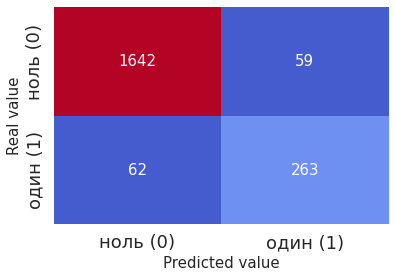

                     precision    recall  f1-score   support

0 Existing Customer       0.96      0.97      0.96      1701
1 Attrited Customer       0.82      0.81      0.81       325

           accuracy                           0.94      2026
          macro avg       0.89      0.89      0.89      2026
       weighted avg       0.94      0.94      0.94      2026



In [214]:
ShowHeat(clf_gs.predict(X_test_ohe), y_test)

В целом, видно, что алгоритмы на основе градиентного бустинга справляются с предложенной задачей классификации заметно лучше, чем алгоритм случайного леса и адаптивного бустинга.

Каждая из реализаций алгоритма град.бустинга имеет большое количество настраиваемых гиперпараметров, перебор которых занимает продолжительное время даже на таком небольшом датасете...при этом выигрыш по метрикам в пределах 1-2 процентов.

Для MLPClassifier удалось добиться точности по f1 для первого класса только на уровне 81%. Причина, возможно, в маленьком размере датасета.